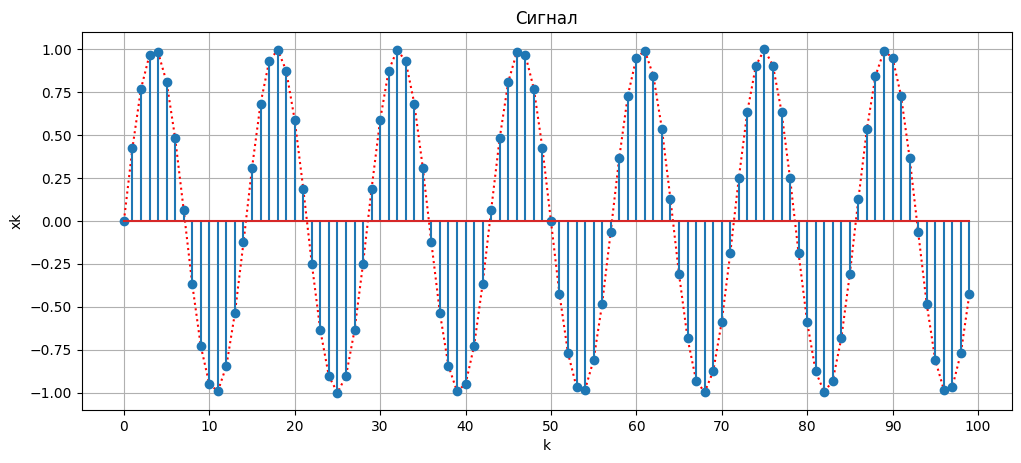

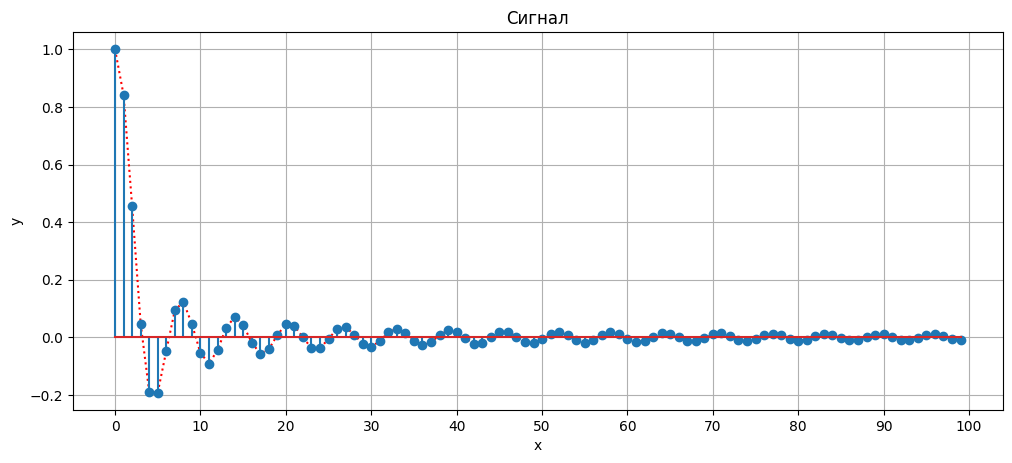

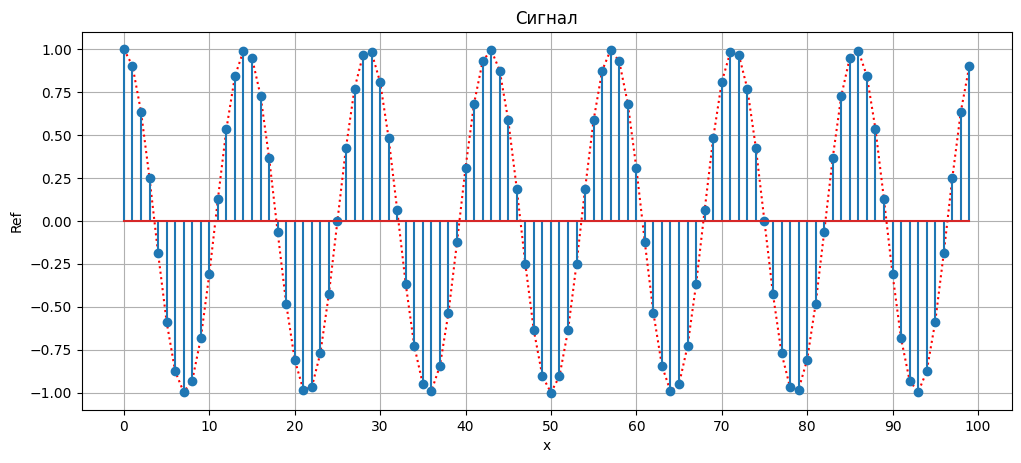

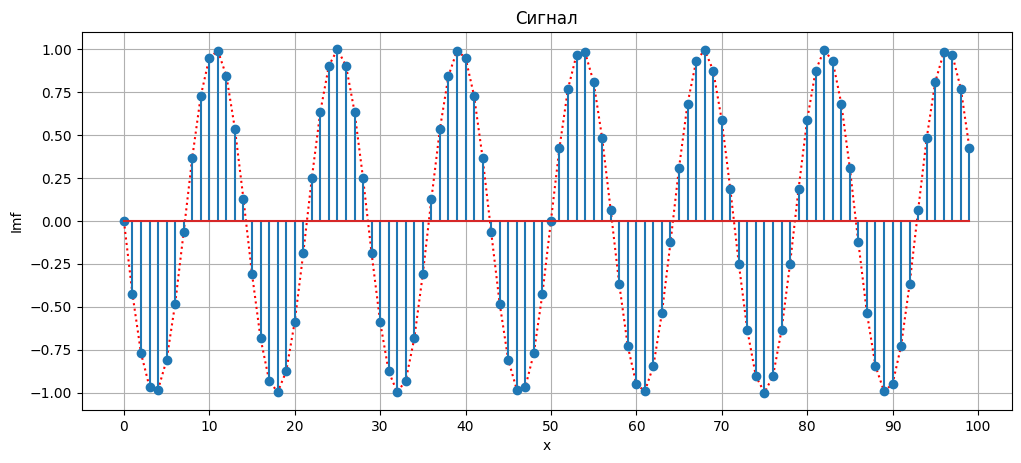

In [33]:
#### Задание 0
#Вариант 5

import numpy as np                # импорт бибилиотеки numpy
import matplotlib.pyplot as plt   # импорт модуля matplotlib.pyplot

#1
#np.array()
x1 = np.array([1, 3, 5, 7, 9])

#np.arange()
x2 = np.arange(1, 10, 2)

#np.linspace()
x3 = np.linspace(1, 9, 5)

#2
x100 = np.arange(0, 100, 1)

#3
k = np.arange(0, 100, 1)
xk = np.sin(2 * np.pi * 0.07 * k)

#4
plt.figure(figsize = [12, 5], dpi = 100)
plt.plot(k, xk, ':r')
#k = np.arrange(xk.size)

plt.stem(k, xk)
plt.xlabel("k")
plt.ylabel("xk")
plt.title("Сигнал")

plt.xticks(np.arange(0, len(k)+1, 10))
plt.xticks(np.arange(0, len(xk)+1, 10))

plt.grid()
plt.show()

#9

def my_fun(x):
    if x == 0:
        return 1
    else:
        return np.sin(x)/x
    
x = np.arange(0, 100, 1)
y = np.zeros(100)
for i in range(100):
    y[i] = my_fun(x[i])

plt.figure(figsize = [12, 5], dpi = 100)
plt.plot(x, y, ':r')
#k = np.arrange(xk.size)

plt.stem(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Сигнал")

plt.xticks(np.arange(0, len(x)+1, 10))
plt.xticks(np.arange(0, len(y)+1, 10))

plt.grid()
plt.show()


#10
x = np.arange(0, 100, 1)
y = np.exp(-1j * 2 * np.pi * 0.07 * x)

Rey = np.real(y)
Imy = np.imag(y)

plt.figure(figsize = [12, 5], dpi = 100)
plt.plot(x, Rey, ':r')
#k = np.arrange(xk.size)

plt.stem(x, Rey)
plt.xlabel("x")
plt.ylabel("Ref")
plt.title("Сигнал")

plt.xticks(np.arange(0, len(x)+1, 10))
plt.xticks(np.arange(0, len(Rey)+1, 10))

plt.grid()
plt.show()


plt.figure(figsize = [12, 5], dpi = 100)
plt.plot(x, Imy, ':r')
#k = np.arrange(xk.size)

plt.stem(x, Imy)
plt.xlabel("x")
plt.ylabel("Imf")
plt.title("Сигнал")

plt.xticks(np.arange(0, len(x)+1, 10))
plt.xticks(np.arange(0, len(Imy)+1, 10))

plt.grid()
plt.show()

C:\Users\mikle\AppData\Local\Temp/ipykernel_15612/2854793388.py:39: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(k/fs, x, 'b', 'bo', label='дискретизованный сигнал $x[k]$')
C:\Users\mikle\AppData\Local\Temp/ipykernel_15612/2854793388.py:60: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(k/fs, y, 'b', 'bo', label='цифровой сигнал $y[k]$')
C:\Users\mikle\AppData\Local\Temp/ipykernel_15612/2854793388.py:80: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(k/fs, z, 'm', 'mo', label="абсолютная ошибка \nквантования \n$\\epsilon[k]=|x[k]-y[k]|$")


[0.02040816 0.00405148 0.00812716 0.00812716 0.00405148 0.02040816
 0.00405148 0.00812716 0.00812716 0.00405148 0.02040816 0.00405148
 0.00812716 0.00812716 0.00405148]


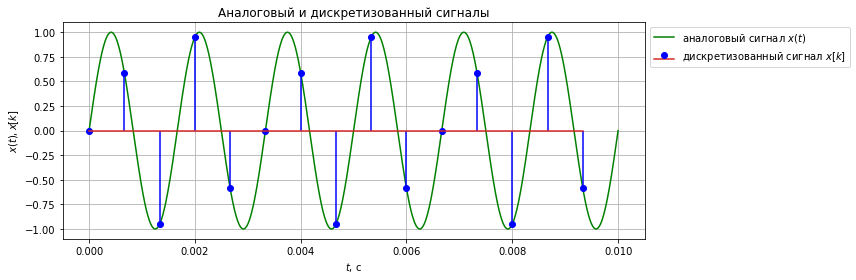

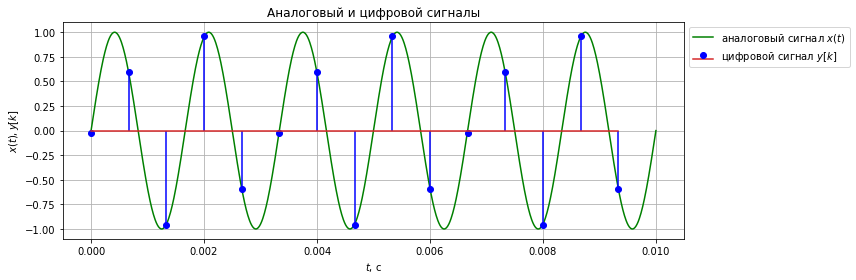

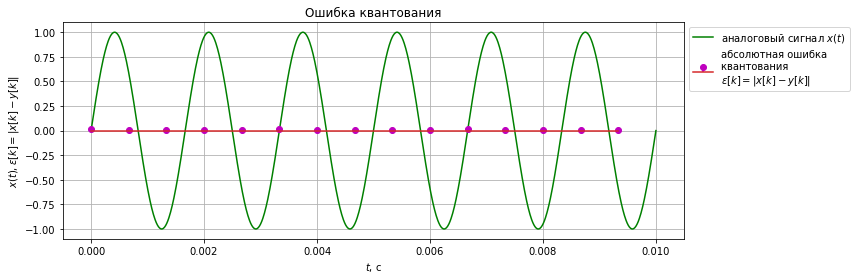

In [1]:
#Задание 1.1 вариант 9

import numpy as np                # импорт бибилиотеки numpy
import matplotlib.pyplot as plt   # импорт модуля matplotlib.pyplot

def quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=5):
    """Uniform quantization approach
    From: Müller M. Fundamentals of music processing: Audio, analysis, algorithms, applications. – Springer, 2015.
    Notebook: C2S2_DigitalSignalQuantization.ipynb
    Args:
        x: Original signal
        quant_min: Minimum quantization level
        quant_max: Maximum quantization level
        quant_level: Number of quantization levels
    Returns:
        x_quant: Quantized signal
    """
    x_normalize = (x-quant_min) * (quant_level-1) / (quant_max-quant_min)
    x_normalize[x_normalize > quant_level - 1] = quant_level - 1
    x_normalize[x_normalize < 0] = 0
    x_normalize_quant = np.around(x_normalize)
    x_quant = (x_normalize_quant) * (quant_max-quant_min) / (quant_level-1) + quant_min
    return x_quant

N=15                                    # Число отсчетов по времени
f0=600.0                                # Частота синусоиды в Гц
fs=1500.0                               # Частота дискретизации в Гц
k=np.arange(N)                          # Mассив времен k от 0 до N-1 с шагом 1
x=np.sin(2*np.pi*(f0/fs)*k)             # Последовательность x[k]
num_levels=50                      # число уровней квантования

          # Построение графиков аналогового и дискретизованного сигнала
plt.figure(figsize=[12, 4])              # создание полотна размером шириной 8 X 4 дюйма
t=np.linspace(0, N/fs, num=1024)        # создание массива времен t (1024 значения от 0 до N*fs)

plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')  
                                        # построение графика x(t) (точки соединяются линиями)
                                        # 'g' означает, что используется зеленая линия (green)
plt.stem(k/fs, x, 'b', 'bo', label='дискретизованный сигнал $x[k]$')            
                                        # построение графика функции дискретного времени x[k]
                                        # 'b', 'bo' означает, что отсчеты оборажаются синим цветом (blue)
plt.grid()                              # сетка
plt.xlabel("$t$, c")                    # подпись оси X
plt.ylabel("$x(t), x[k]$")              # подпись оси Y
plt.title("Аналоговый и дискретизованный сигналы") # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()                      # автоматическая корректировка расположения осей графика

# моделирование квантования дискретного сигнала
y=quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=num_levels)
bins=np.linspace(-1, 1, num_levels)


# Вывод графика аналогового и цифрового сигнала
plt.figure(figsize=[12, 4])                  # создание полотна размером шириной 8 X 4 дюйма
t=np.linspace(0, N/fs, num=1024)            # создание массива времен t (1024 значения от 0 до N*fs)
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')        
                                            # построение графика x(t) (точки соединяются линиями)

plt.stem(k/fs, y, 'b', 'bo', label='цифровой сигнал $y[k]$')                
                                            # построение графика функции дискретного времени y[k]
                                            # k/fs - м
    
if num_levels<21:                           # если число уровней не велико, то производится
    plt.yticks(bins)                        # установка делений шкалы оси Y, совпадающих с уровнями квантования

plt.grid()                                  # сетка
plt.xlabel("$t$, c")                        # подпись оси X
plt.ylabel("$x(t), y[k]$")                  # подпись оси Y
plt.title("Аналоговый и цифровой сигналы")  # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()                          # автоматическая корректировка расположения осей графика

z = abs(x-y)
print(z)

plt.figure(figsize=[12, 4])
plt.title("Ошибка квантования") 
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')
plt.stem(k/fs, z, 'm', 'mo', label="абсолютная ошибка \nквантования \n$\\epsilon[k]=|x[k]-y[k]|$")       
                                      #вывод абсолютных значений ошибки квантования для дискретного сигнала
#plt.yticks(bins)
plt.grid()
plt.xlabel("$t$, c")                                          # подпись оси X
plt.ylabel("$x(t), \\varepsilon[k]=|x[k]-y[k]|$")             # подпись оси Y
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.show()

int16
135680
44100
Длительность файла c: 3.076643990929705
Размер файла kбайт: 265.0
Реальный размер файла 266 кБайт


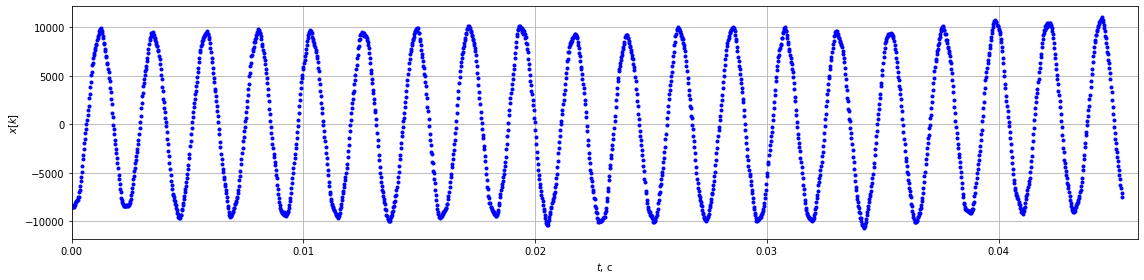

In [17]:
#1.2

import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
import scipy.io.wavfile # импорт модуля scipy.io.wavfile
from IPython.display import Audio
Audio('./tuning-fork.wav')

fs, x = scipy.io.wavfile.read('./tuning-fork.wav') # чтение аудиофайла 
print(x.dtype)
print(x.size)
print(fs)     #частота дискретизации в Гц
print("Длительность файла c:", x.size * (1/fs))
print("Размер файла kбайт:", (2 * x.size)/1024)
print("Реальный размер файла 266 кБайт")

x1 = x[8000:10000]                     # выбор наблюдаемого диапазона
k=np.arange(x1.size)               # отсчеты по времени
# Построение графиков 
plt.figure(figsize=[16, 4])         # создание полотна размером шириной 8 X 4 дюйма
plt.plot(k/fs, x1, 'b.')           # построение графика цифрового сигнала точками точками
plt.grid()                             
plt.xlabel("$t$, c")                      
plt.ylabel("$x[k]$")   
plt.xlim(0, 0.046) #пределы графика
plt.tight_layout()

C:\Users\mikle\AppData\Local\Temp/ipykernel_15612/2654441554.py:30: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
C:\Users\mikle\AppData\Local\Temp/ipykernel_15612/2654441554.py:31: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])


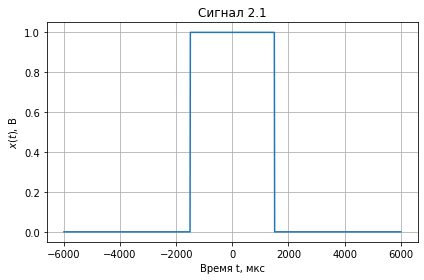

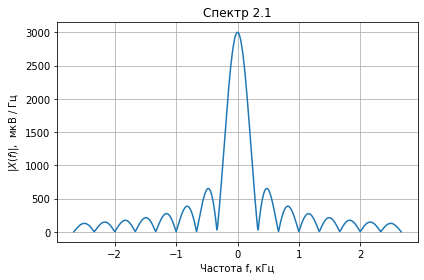

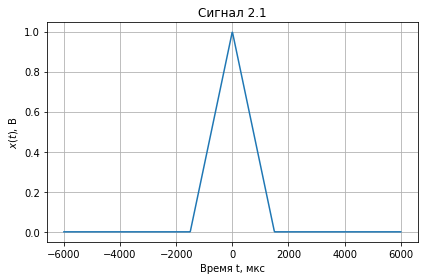

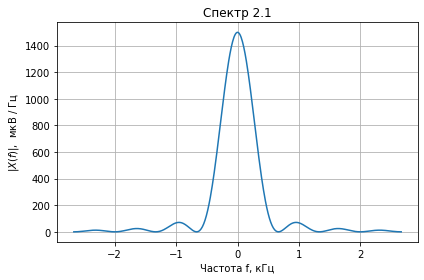

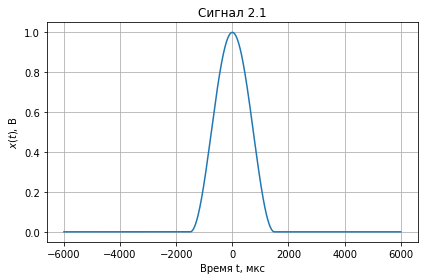

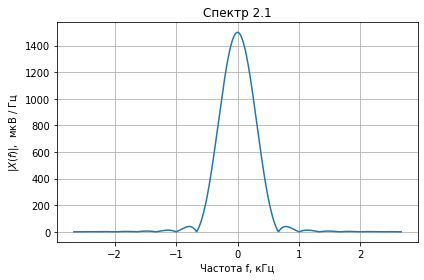

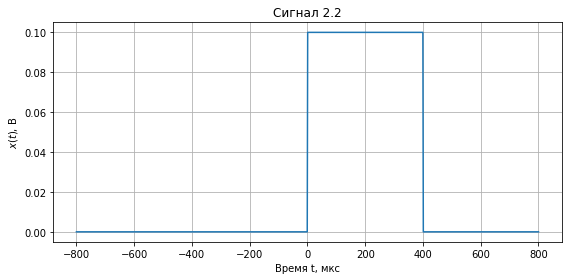

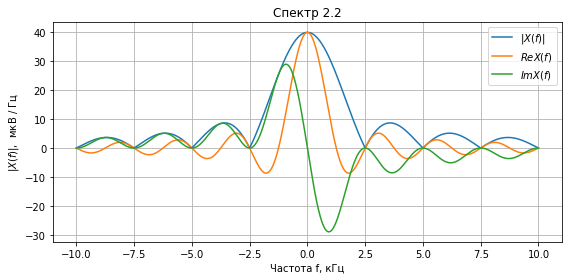

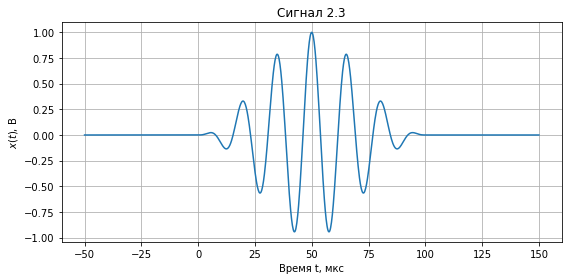

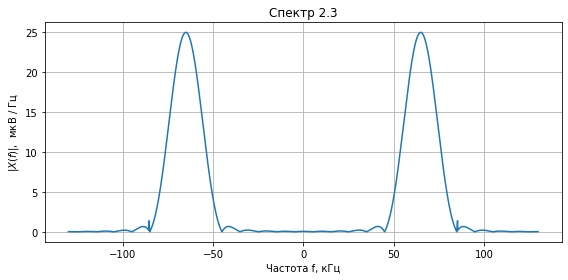

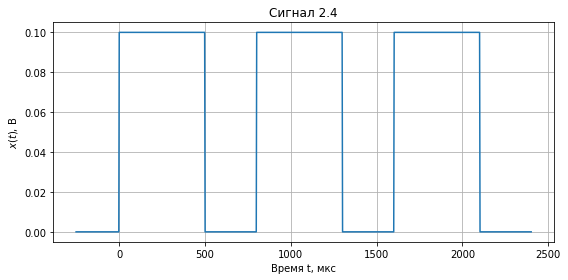

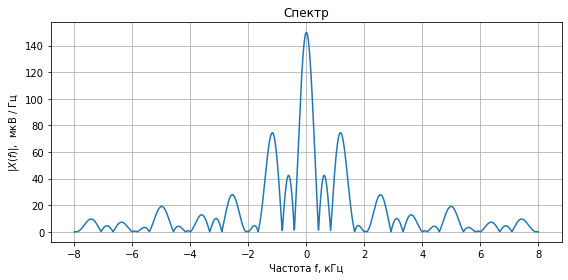

In [5]:
#2.1

import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
import scipy.integrate as integrate # импорт модуля численного интегрирования

def integrate_function(t, func, f, tau, real_part=True):
    # Подынтегральное выражение для использованиия в функции integrate.quad
    # t - время
    # func - функция, задающая импульс
    # f - частота
    # tau - константа, используемая для задания длительности импульса
    if real_part:
        return func(t, tau)*np.cos(-2*np.pi*f*t)  # действительная часть интеграла
    else:
        return func(t, tau)*np.sin(-2*np.pi*f*t)  # мнимая часть интеграла

def fourier_transform(signal, f_band, tau, t1, t2, res_type='abs'):
    # вычисление преобразования Фурье для набора частот
    # signal - функция от t и tau, задающая сигнал во временной области 
    # f_band - набор частот, для которых вычисляется преобразование Фурье
    # tau - константа, используемая для задания длительности импульса
    # t1 момент начала сигнала
    # t2 момент завершения сигнала
    # тип возвращаемого значения:
    # res_type='abs' - |X(f)|
    # res_type='Re' - Re X(f)
    # res_type='Im' - Im X(f)
    if res_type=="abs":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return abs(Re+1j*Im)
    elif res_type=="Re":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        return Re
    elif res_type=="Im":
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return Im
    
tau=3000e-6 #100 мкс

f_band=np.linspace(-8/tau, 8/tau, 500) # 500 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if abs(t)<tau/2:
        return 1.0                 
    else:
        return 0.0                 
    
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[6, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал 2.1")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[6, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6)
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр 2.1")
plt.tight_layout() 
plt.grid()

#треугольное окно
def trianglecar(t, tau):
    if abs(t)<tau/2:
        return (1.0 - 2 * (abs(t) / tau))                 
    else:
        return 0.0                 
    
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[6, 4])
plt.plot(t_band*1e6, [trianglecar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал 2.1")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[6, 4])
plt.plot(f_band/1e3, fourier_transform(signal=trianglecar, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6)
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр 2.1")
plt.tight_layout() 
plt.grid()


def Hanncar(t, tau):
    if abs(t)<tau/2:
        return (1 + np.cos(2 * np.pi * t / tau))/2                 
    else:
        return 0.0                 
    
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[6, 4])
plt.plot(t_band*1e6, [Hanncar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал 2.1")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[6, 4])
plt.plot(f_band/1e3, fourier_transform(signal=Hanncar, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6)
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр 2.1")
plt.tight_layout() 
plt.grid()




#2.2
tau=400*1e-6 #150 мкс

f_band=np.linspace(-4/tau, 4/tau, 1000) # 1000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if 0<t<tau:
        return 0.1 # 0.1 В
    else:
        return 0.0 # 0 В
    
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал 2.2")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, label='$|X(f)|$')
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Re")*1e6, label='${Re }X(f)$')
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Im")*1e6, label='${Im }X(f)$')
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр 2.2")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.grid()


#2.3
f0=65*1e3       # 10 кГц
tau=100*1e-6    # 500 мкс

def sin_with_boxcar(t, tau):                            
    if 0<=t<=tau:
        # случай прямоугольного окна
        #return np.sin(2*np.pi*f0*t) 
        # случай окна Ханна
        #
        return np.sin(2*np.pi*f0*t) * (0.5+0.5*np.cos(np.pi*(t-tau/2)/(tau/2)))
    else:
        return 0.0
    
f_band=np.linspace(-2*f0, 2*f0, 2000) 

t_band=np.linspace(-0.5*tau, 1.5*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [sin_with_boxcar(t, tau) for t in t_band])
plt.title("Сигнал 2.3")
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=sin_with_boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6)
plt.title("Спектр 2.3")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()




# 2.4
N=3
tau=500e-6 #500 мкс
period = 800e-6 

f_band=np.linspace(-4/tau, 4/tau, 2000) # 2000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    
    for n in range(N):
        tau0 = period * n
        tau1 = tau + period * n
        if tau0 < t < tau1:
            return 0.1 # 0.1 В
    return 0.0 # 0 В
    
t_band=np.linspace(-0.5*tau, N*period, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал 2.4")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=0, t2=N*period, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()



C:\Users\mikle\AppData\Local\Temp/ipykernel_15612/1688383600.py:76: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(tk*1e6, xk*fs, 'b', 'bo', label='отсчеты сигнала $x[k]/{\\Delta t}$')


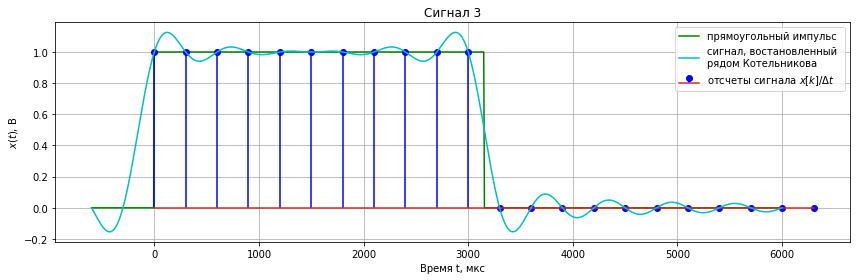

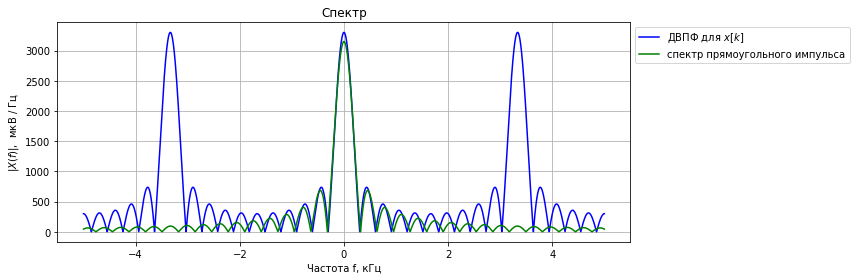

In [8]:
#3

import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

def integrate_function(t, func, f, tau, real_part=True):
    # Подынтегральное выражение для использованиия в функции integrate.quad
    # t - время
    # func - функция, задающая импульс
    # f - частота
    # tau - константа, используемая для задания длительности импульса
    if real_part:
        return func(t, tau)*np.cos(-2*np.pi*f*t)  # действительная часть интеграла
    else:
        return func(t, tau)*np.sin(-2*np.pi*f*t)  # мнимая часть интеграла

def fourier_transform(signal, f_band, tau, t1, t2, res_type='abs'):
    # вычисление преобразования Фурье для набора частот
    # signal - функция от t и tau, задающая сигнал во временной области 
    # f_band - набор частот, для которых вычисляется преобразование Фурье
    # tau - константа, используемая для задания длительности импульса
    # t1 момент начала сигнала
    # t2 момент завершения сигнала
    # тип возвращаемого значения:
    # res_type='abs' - |X(f)|
    # res_type='Re' - Re X(f)
    # res_type='Im' - Im X(f)
    if res_type=="abs":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return abs(Re+1j*Im)
    elif res_type=="Re":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        return Re
    elif res_type=="Im":
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return Im
    
def DTFT_abs3(xk, fs, M=2048):
    res=abs(np.fft.fftshift(np.fft.fft(xk, M)))
    return fs*np.arange(-1.5, 1.5, 1/M), np.hstack((res, res, res)) 

tau=3000*1e-6 #3000 мкс
fs=10/tau

f_band=np.linspace(-1.5*fs, 1.5*fs, 2000) # 2000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if 0 <= t <= 1.05*tau:
        return 1.0 
    elif np.isclose(t, 1.05*tau, atol=1e-12) or np.isclose(t, 0, atol=1e-12):
        return 1.0 
    else:
        return 0.0 

def sinc_phi(t, k, fs):
    dt=1/fs
    if np.isclose(0, t-k*dt):
        return 1.0
    else:
        return np.sin(np.pi*fs*(t-k*dt))/(np.pi*fs*(t-k*dt))
    
def sinc_interp(t, xk):
    #print([xk*fs*sinc_phi(t, k, fs) for k in range(len(xk))])
    return sum([xk[k]*fs*sinc_phi(t, k, fs) for k in range(len(xk))])
    


tk = np.arange(0, 2*tau+1.0/fs, 1.0/fs, dtype=float)
xk = np.array([(1/fs)*boxcar(tk1, tau) for tk1 in tk])
    
t_band=np.linspace(-0.2*tau, 2*tau, 1024)
plt.figure(figsize=[12, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band], 'g', label='прямоугольный импульс')
plt.stem(tk*1e6, xk*fs, 'b', 'bo', label='отсчеты сигнала $x[k]/{\\Delta t}$')



plt.plot(t_band*1e6, np.array([sinc_interp(t, xk) for t in t_band]), 'c', label='сигнал, востановленный \nрядом Котельникова')

plt.title("Сигнал 3")
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 

plt.figure(figsize=[12, 4])


DFTF_plot=DTFT_abs3(xk, fs)
plt.plot(DFTF_plot[0]/1e3, DFTF_plot[1]*1e6, 'b', label='ДВПФ для $x[k]$')

plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, 
         'g', label='спектр прямоугольного импульса')


plt.title("Спектр")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 

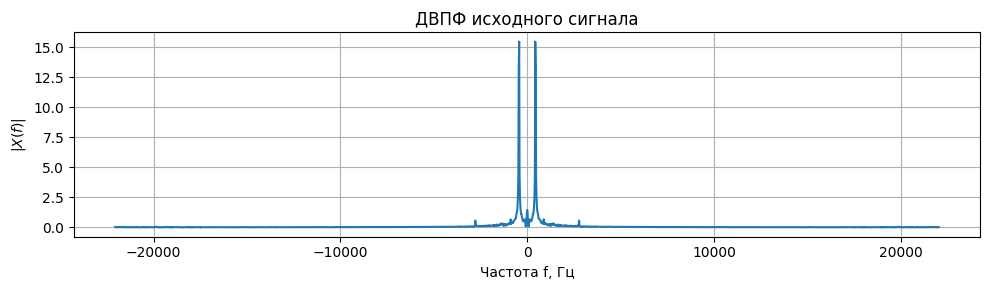

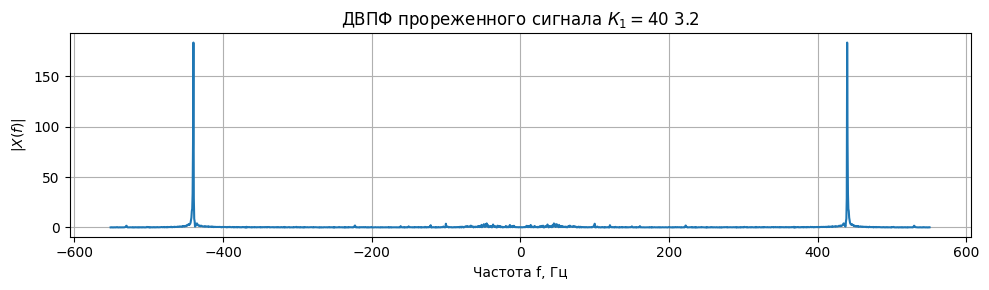

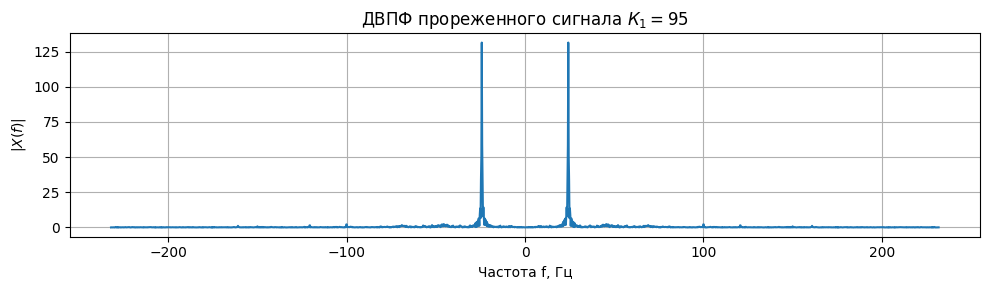

In [14]:
#3.2

import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile
from scipy import signal

def DTFT_abs(xk, fs, M=2048):
    res=abs(np.fft.fftshift(np.fft.fft(xk, M)))
    return fs*np.arange(-0.5, 0.5, 1/M), np.hstack((res)) 

fs, x=scipy.io.wavfile.read('./tuning-fork.wav')
#for mono channel 
#x=x[:,1] 

plt.figure(figsize=[10, 3], dpi=100)

DFTF_plot=DTFT_abs(x/fs, fs)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ исходного сигнала")
plt.xlabel("Частота f, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 

# downsampling
plt.figure(figsize=[10, 3], dpi=100)
K=40
y=np.zeros(x.size//K+1)

u=0
for xk in np.arange(0, x.size, K):
    y[u]=x[xk]/K
    u=u+1
# end 
DFTF_plot=DTFT_abs(y/(fs/K), fs/K)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ прореженного сигнала $К_1=$%i 3.2" %K)
plt.xlabel("Частота f, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 

# downsampling
plt.figure(figsize=[10, 3], dpi=100)
K=95
y=np.zeros(x.size//K+1)

u=0
for xk in np.arange(0, x.size, K):
    y[u]=x[xk]/K
    u=u+1
# end
    
DFTF_plot=DTFT_abs(y/(fs/K), fs/K)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ прореженного сигнала $К_1=$%i" %K)
plt.xlabel("Частота f, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 